# Application installation predictions on the Google Play Store

This data science project aims to predict the number of installations (Installs) of an application on the Google Playstore based on available data columns, including App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated , Current Ver, and Android Ver.

The data analysis process includes several stages, including:

## 1. Data Collection and Cleaning
The data used in this project is obtained from Google Playstore and contains information about the applications available on the platform. The data columns used are as follows:

- App: App name
- Category: Application category
- Rating: App rating (1-5)
- Reviews: Number of app reviews
- Size: App size
- Installs: The number of application installations
- Type: Application type (paid/free)
- Price: Application price
- Content Rating: App content rating (recommended user age)
- Genres: Application genres
- Last Updated: Last time the app was updated
- Current Ver: The latest version of the application
- Android Ver: Minimum Android version required to run the application

Before performing the analysis, the data will be cleaned of missing or invalid values.

## 2. Data Visualization
After cleaning the data, the data will be visualized using several methods such as bar charts, pie charts, and scatter plots. It aims to show the relationship between the features in the data and the number of Installs.

Data visualization is very important in the process of data analysis because it allows us to visually understand patterns and relationships between features in data. This can help us to determine the features that have the most influence on Installs predictions and can also provide new insights for application developers regarding what factors influence the popularity of their applications on the Google Playstore.

## 3. Feature Engineering
Feature Engineering is the process of processing features or data columns owned to obtain information that is more relevant and has a significant impact on prediction results. The goal of feature engineering is to improve the performance of machine learning models by selecting the features that have the most influence in predicting the number of Installs on apps on the Google Playstore.

In this project, several feature engineering techniques were carried out, such as:
- change the data columns containing object values to category
- delete irrelevant data columns.
- handles missing values by filling empty values with the average value.

After engineering techniques have been carried out, the resulting data is cleaner and structured so that it can provide more accurate predictive results in machine learning models. The feature engineering process can also help eliminate noise or disturbances in the data so that the model can more easily learn the patterns contained in the data and produce better predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# to determine how many NaN values in df

df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 1. Data Collection and Cleaning

### Type

In [7]:
# we can see the dataframe based on Type column

df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [8]:
# to drop all NaN values in our dataframe

df = df.dropna()

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [11]:
# we can see that we have 2 values in type column (FREE & PAID)

df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [12]:
# this is a way to create and expand the column of type into "free" and "paid" columns
# and the values it contains are of type bool

for elem in df['Type'].unique():
    df[str(elem)] = df['Type'] == elem

### Category

In [13]:
# we have 33 Categories in Category column

df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [14]:
# this is a way to create and expand the Category column as same as Type column like we did before

for elem in df['Category'].unique():
    df[str(elem)] = df['Category'] == elem

In [15]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Free', 'Paid', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES',
       'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype='object')

### Content Rating 

In [16]:
# we have 6 values in Content rating column
# and this is another way to see in a different way, because I made this column first to distinct
# the values in the dataframe, so we can see what values we got in Content Rating column here

distinct_content_rating = df.drop_duplicates(['Content Rating'])
# distinct_content_rating['Content Rating'].count()   #6
pd.DataFrame(distinct_content_rating['Content Rating'])  

,Content Rating
0,Everyone
3,Teen
22,Everyone 10+
133,Mature 17+
298,Adults only 18+
8266,Unrated


In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,SPORTS,TRAVEL_AND_LOCAL,TOOLS,PERSONALIZATION,PRODUCTIVITY,PARENTING,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,False,False


### Price

In [18]:
# this is a way to change the values in Price column, for example from "$5" become "5" 

df.Price = df.Price.apply(lambda x: x.replace('$', ''))
df.Price = df.Price.astype('float')

### Reviews

In [19]:
# this is a way to change the type of Price column from object become int

df.Reviews = df.Reviews.astype('int')
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

### Last Updated

In [20]:
# This is a way to change the Last Updated column from object type become datetime type

from datetime import datetime

df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9360, dtype: datetime64[ns]

### Installs

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
# this is a way to change the values in Installs column, for example from "10,000+" become "10000" 

df.Installs = df.Installs.apply(lambda x : x.replace(',', ''))
df.Installs = df.Installs.apply(lambda x: x.replace('+', ''))
df.Installs = df.Installs.apply(lambda x: int(x))

In [23]:
df.Installs.info()

<class 'pandas.core.series.Series'>
Int64Index: 9360 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
9360 non-null   int64
dtypes: int64(1)
memory usage: 146.2 KB


In [24]:
# to check the entire of dataframe columns 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Free', 'Paid', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES',
       'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype='object')

In [25]:
# this is a way to change several columns from object types become a category type

cat = ['App', 'Category', 'Type',
       'Content Rating', 'Genres']

for var in cat:
    df[cat] = df[cat].astype('category')
    
df.dtypes

App                          category
Category                     category
Rating                        float64
Reviews                         int32
Size                           object
Installs                        int64
Type                         category
Price                         float64
Content Rating               category
Genres                       category
Last Updated           datetime64[ns]
Current Ver                    object
Android Ver                    object
Free                             bool
Paid                             bool
ART_AND_DESIGN                   bool
AUTO_AND_VEHICLES                bool
BEAUTY                           bool
BOOKS_AND_REFERENCE              bool
BUSINESS                         bool
COMICS                           bool
COMMUNICATION                    bool
DATING                           bool
EDUCATION                        bool
ENTERTAINMENT                    bool
EVENTS                           bool
FINANCE     

### Size

In [26]:
# this is a way to change the values in Size column, for example from "15k" become "15" 
# and we need to convert all the "Variaes with device" values to be a "NaN" value

df.Size = df.Size.apply(lambda x : x.replace('M', ''))
df.Size = df.Size.apply(lambda x : x.replace('k', ''))
df.Size = df.Size.apply(lambda x: x.replace('Varies with device', 'NaN'))
df.Size = df.Size.apply(lambda x: float(x))
df.Size.info()

df['Size']

<class 'pandas.core.series.Series'>
Int64Index: 9360 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
7723 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 9360, dtype: float64

In [27]:
# First of all, we need to find the mean of this column, and then keep the mean value 
# in "meansize" variable, finally fill or change all the "NaN" values become the mean value

df['Size'].isna().sum()
# df.Size.dropna()
df.Size = df.Size.fillna(0)
meansize = df.Size.mean()
df.Size = df.Size.fillna(meansize)
df.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     0.0
10840    19.0
Name: Size, Length: 9360, dtype: float64

## 2. Data Visualization

In [28]:
# remove some columns that are not too important

df = df.drop(['Current Ver', 'Android Ver'], axis=1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,SPORTS,TRAVEL_AND_LOCAL,TOOLS,PERSONALIZATION,PRODUCTIVITY,PARENTING,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# this is a way to create and expand the Content Rating column,
# and this method is the same as some columns like we did before

for elem in df['Content Rating'].unique():
    df[str(elem)] = df['Content Rating'] == elem
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,True,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,False,False,False,False,False,True,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,False,False,False,False,True,False,False,False,False,False


In [30]:
# let's see the temporary of our dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  9360 non-null   category      
 1   Category             9360 non-null   category      
 2   Rating               9360 non-null   float64       
 3   Reviews              9360 non-null   int32         
 4   Size                 9360 non-null   float64       
 5   Installs             9360 non-null   int64         
 6   Type                 9360 non-null   category      
 7   Price                9360 non-null   float64       
 8   Content Rating       9360 non-null   category      
 9   Genres               9360 non-null   category      
 10  Last Updated         9360 non-null   datetime64[ns]
 11  Free                 9360 non-null   bool          
 12  Paid                 9360 non-null   bool          
 13  ART_AND_DESIGN       9360 non-nu

Text(0.5, 1.0, 'Type (paid or free) across rating')

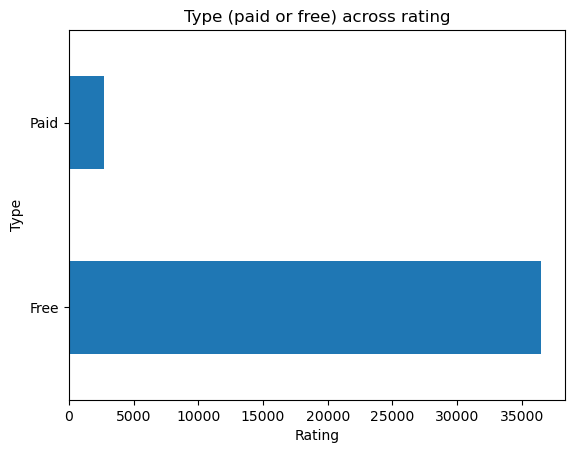

In [31]:
# Visualization of Type "paid or free" across Rating
# the "free" Type has the most Rating than the "paid"

tipe_rating = df.groupby(['Type']).sum()['Rating']
tipe_rating.plot(kind='barh')
plt.ylabel('Type')
plt.xlabel('Rating')
plt.title('Type (paid or free) across Rating')

Text(0.5, 1.0, 'Type (paid or free) across Installers')

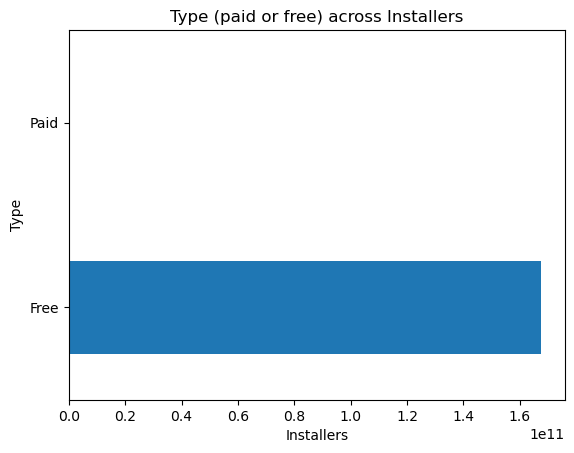

In [32]:
# Visualization of Type "paid or free" across Installers
# the "free" Type has the most installers than the "paid"

tipe_install = df.groupby(['Type']).sum()['Installs']
tipe_install.plot(kind='barh')
plt.ylabel('Type')
plt.xlabel('Installers')
plt.title('Type (paid or free) across Installs')


Text(0.5, 1.0, 'type (paid or free) across rating')

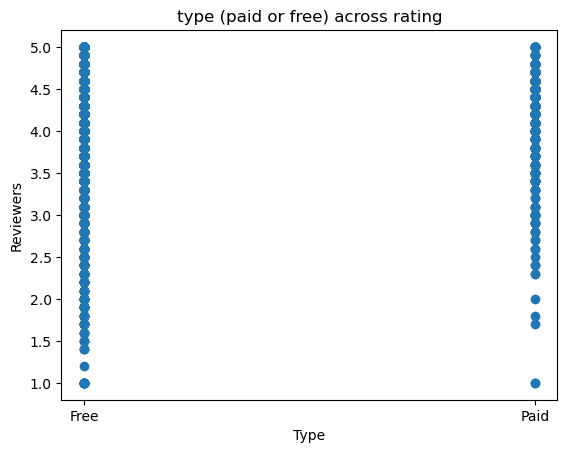

In [33]:
# typereviews = df.groupby(['Type']).sum()['Reviews']
plt.scatter(df['Type'], df['Rating'])
plt.xlabel('Type')
plt.ylabel('Reviewers')
plt.title('type (paid or free) across rating')

Text(0.5, 1.0, 'Category across reviewers')

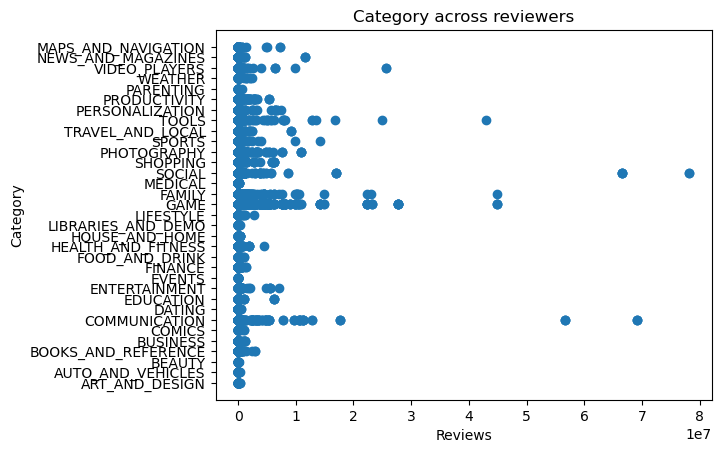

In [34]:
# Visualization of the Category column across Reviews

plt.scatter(df['Reviews'], df['Category'])
plt.xlabel('Reviews')
plt.ylabel('Category')
plt.title('Category across reviewers')

Text(0.5, 1.0, 'Category across total Rating')

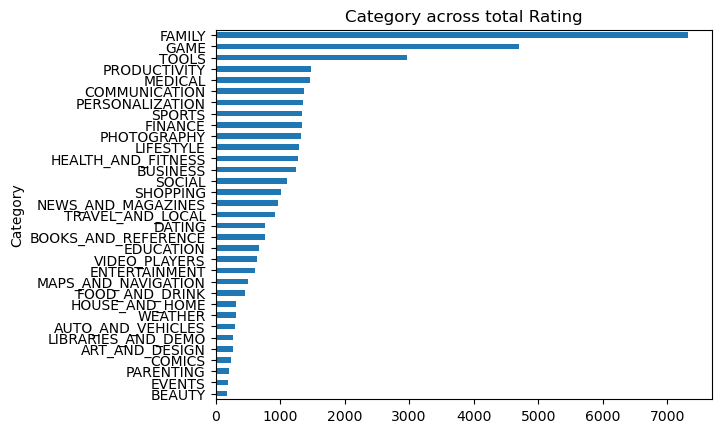

In [35]:
# Visualization of the Category column across Rating
# as we can see that family, game and tools had ranked as the most Rating than others

category_rating = df.groupby(['Category']).sum()['Rating'].sort_values(ascending=True)
category_rating.plot(kind='barh')
plt.ylabel('Category')
plt.title('Category across total Rating')

Text(0.5, 1.0, 'Category across total of Installers')

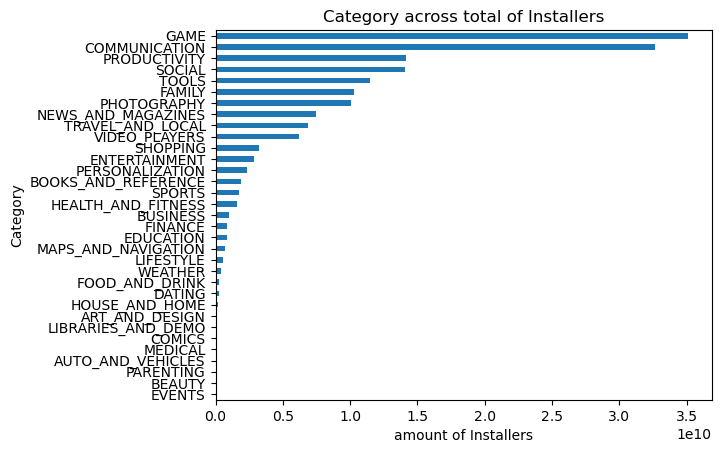

In [36]:
# визуализация category mana yg install nya tinggi

category_installs = df.groupby(['Category']).sum()['Installs'].sort_values(ascending=True)
category_installs.plot(kind='barh')
plt.ylabel('Category')
plt.xlabel('amount of Installers')
plt.title('Category across total of Installers')

Text(0.5, 1.0, 'Rating across Reviews')

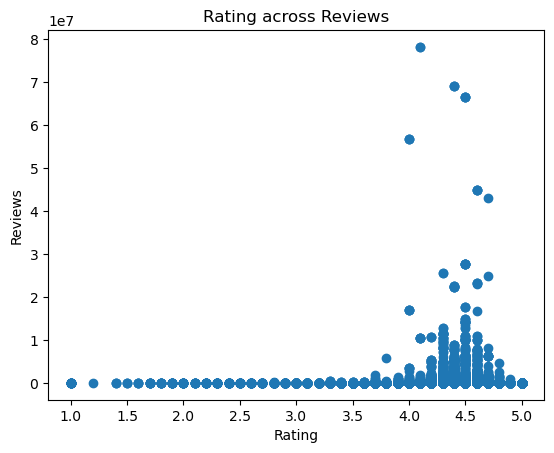

In [40]:
plt.scatter(df['Rating'], df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Rating across Reviews')

Text(0.5, 1.0, 'Installs across reviews')

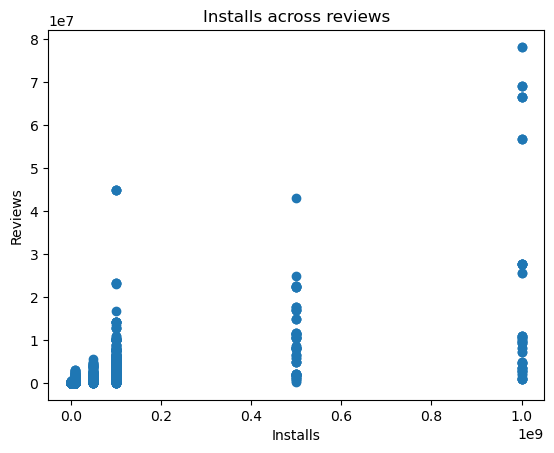

In [41]:
plt.scatter(df['Installs'], df['Reviews'])
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.title('Installs across reviews')

<AxesSubplot:>

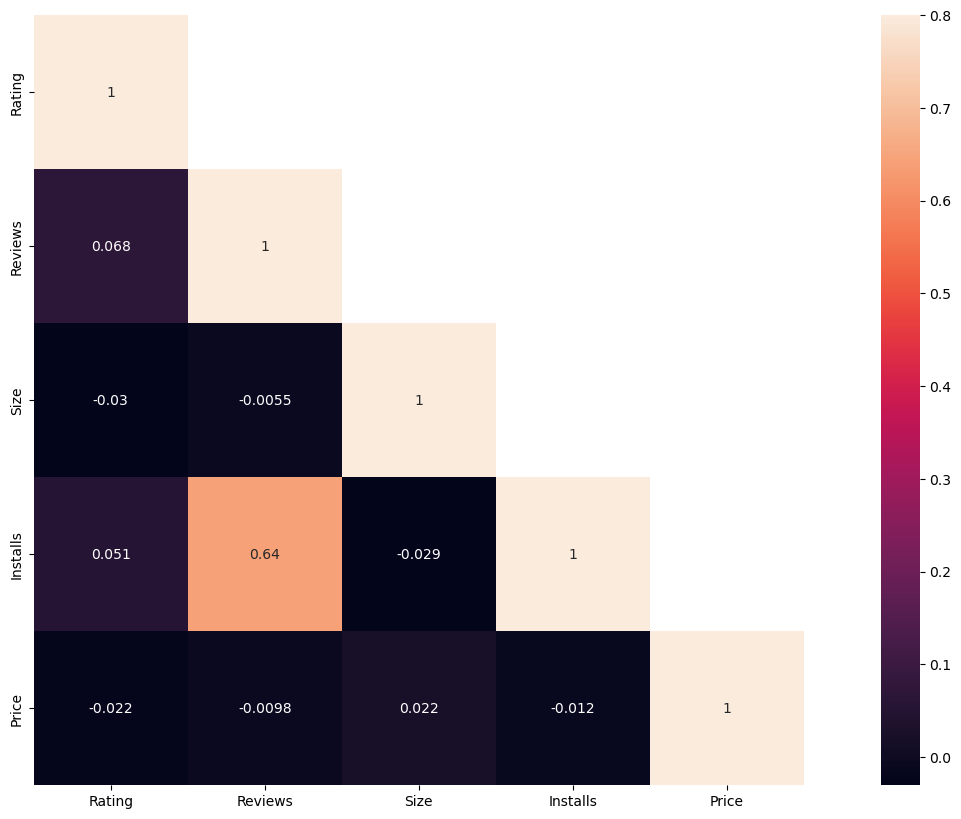

In [38]:
# df.head()
corrMatt = df[["Rating","Reviews","Size","Installs","Price", 'Type']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## 3. Feature Engineering

### Build the model of machine learning

Here are below what methods that I used as the model:
- Linear Regression;
- KNN Neighbors Regressor;
- Gradient Boosting Regressor;
- Decision Tree;
- Neural Network MLPRegressor;
- and Tensorflow & Keras in my VSCode

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,True,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,False,False,False,False,True,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,False,False,False,False,False,True,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,False,False,False,False,True,False,False,False,False,False


In [43]:
col = df[['Reviews', 'Size','Rating', 'Price', 'Everyone', 'Teen', 'Everyone 10+', "Mature 17+",'Adults only 18+',
        'Unrated', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
        'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 
        'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
        'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS',
        'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', 'Free', 'Paid']]

X = col.values
y = df['Installs'].values

In [44]:
dfinfo = df.columns
dfinfo = list(dfinfo)
res = len(dfinfo) - 1
print('banyak column X adalah', res)

banyak column X adalah 51


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=101)

## Linear Regression

In [46]:
import sklearn.linear_model as lm

model = lm.LinearRegression(normalize=True)
model.fit(X_train, y_train)

# print(model.coef_, model.intercept_)

C:\Users\RAFLY AULYA RIZKY N\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [47]:
coef = model.coef_
coef

array([ 1.73429688e+01, -2.05406934e+04,  2.37462512e+06,  1.57912435e+04,
       -2.68884422e+19, -2.68884422e+19, -2.68884422e+19, -2.68884422e+19,
       -2.68884422e+19, -2.68884422e+19, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -1.80816375e+20,
       -1.80816375e+20, -1.80816375e+20, -1.80816375e+20, -4.96278161e+18,
       -4.96278161e+18])

In [48]:
model.intercept_

2.1266759867689547e+20

In [49]:
model.score(X_train, y_train)

0.48245183799074687

In [50]:
model.score(X_test, y_test)

0.3116243882009615

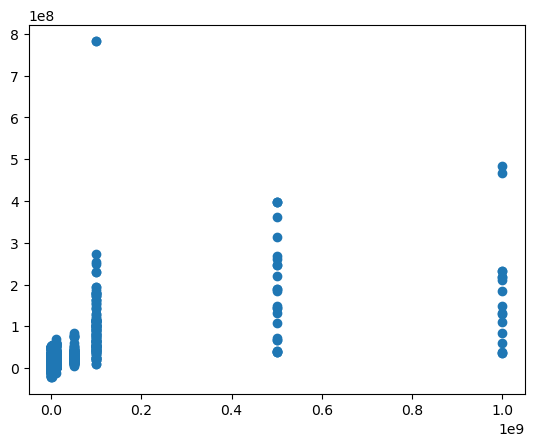

In [51]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)
plt.show()

### KNeighbors Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
y_pred = knn.predict(X_test)

In [54]:
knn.score(X_train, y_train)

0.782653985218802

In [55]:
knn.score(X_test, y_test)

0.5673784087092171

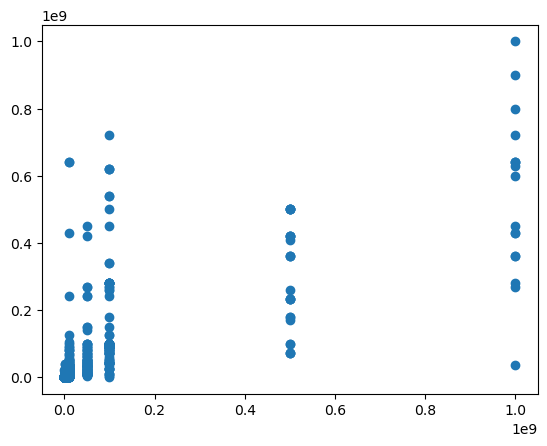

In [56]:
plt.scatter(y_test, y_pred)
plt.show()

### Gradient Boosting Regressor

In [108]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import 

reg = GradientBoostingRegressor(random_state=7)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=7)

In [109]:
reg.predict(X_test)

array([5.69148791e+05, 1.85854182e+08, 1.23823773e+08, ...,
       1.83624109e+07, 7.96461818e+06, 4.07949625e+07])

In [110]:
reg.score(X_train, y_train)

0.926807531475143

In [111]:
reg.score(X_test, y_test)

0.7930100484222306

### Decision Tree

In [82]:
from sklearn import tree

dct = tree.DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) # 7
dct = dct.fit(X_train, y_train)


In [83]:
y_pred2 = dct.predict(X_test)
# y_pred2

In [84]:
dct.score(X_train, y_train)

0.8659029079961243

In [85]:
dct.score(X_test, y_test)

0.7294187913865353

In [86]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred2)
print('accuracy:', r2score)

accuracy: 0.7294187913865353


In [66]:
dct.feature_importances_

array([7.41342467e-01, 3.82041034e-02, 1.14944462e-01, 4.74567653e-08,
       7.69466402e-04, 3.92184896e-02, 1.50759795e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.51642792e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.87121898e-05, 0.00000000e+00,
       2.87010351e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.41135289e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.46942559e-07, 0.00000000e+00,
       1.36899341e-06, 0.00000000e+00, 0.00000000e+00, 1.06326608e-04,
       0.00000000e+00, 0.00000000e+00, 3.09680594e-05, 6.22956589e-05,
       0.00000000e+00, 1.70724027e-02, 0.00000000e+00, 0.00000000e+00,
       3.98096712e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.45921100e-09])

[Text(0.6882440476190477, 0.9375, 'X[0] <= 7920916.0\nsquared_error = 8231322094259795.0\nsamples = 6552\nvalue = 17636531.127'),
 Text(0.4419642857142857, 0.8125, 'X[0] <= 854932.0\nsquared_error = 3381834929926886.5\nsamples = 6472\nvalue = 11272334.972'),
 Text(0.29910714285714285, 0.6875, 'X[0] <= 282047.5\nsquared_error = 165610377363420.38\nsamples = 6011\nvalue = 3275586.748'),
 Text(0.1875, 0.5625, 'X[0] <= 37326.5\nsquared_error = 30452876943005.598\nsamples = 5585\nvalue = 1883894.708'),
 Text(0.09523809523809523, 0.4375, 'X[0] <= 8201.0\nsquared_error = 8263204997992.547\nsamples = 4411\nvalue = 562015.856'),
 Text(0.047619047619047616, 0.3125, 'X[0] <= 2073.5\nsquared_error = 254310735013.471\nsamples = 3469\nvalue = 143655.792'),
 Text(0.023809523809523808, 0.1875, 'X[0] <= 355.5\nsquared_error = 46996053528.201\nsamples = 2782\nvalue = 45011.482'),
 Text(0.011904761904761904, 0.0625, 'squared_error = 52487646729.88\nsamples = 1950\nvalue = 16220.483'),
 Text(0.03571428571

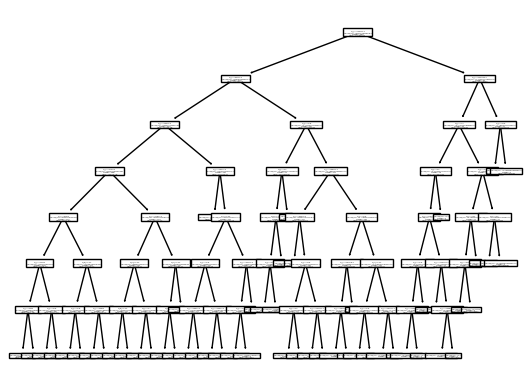

In [87]:
tree.plot_tree(dct)

### Neural network MLPRegressor

In [68]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

mlp = MLPRegressor(solver='adam', alpha=0.0001, #learning_rate_init=0.1,
                   hidden_layer_sizes=(100,64), activation='relu')
mlp.fit(X_train , y_train)

MLPRegressor(hidden_layer_sizes=(100, 64))

In [69]:
mlp.predict(X_test)
# np.array(a)

array([2.36229556e+04, 1.40999439e+08, 9.43190002e+07, ...,
       6.33350808e+06, 2.44208913e+06, 2.02940244e+07])

In [70]:
[coef.shape for coef in mlp.coefs_]

[(45, 100), (100, 64), (64, 1)]

In [71]:
mlp.score(X_train, y_train)

0.45758341919586243

In [72]:
mlp.score(X_test, y_test)

0.27812516247946883

In [73]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

It can be concluded that there are several models that have good train and test scores, namely decision tree and gradient boosting regressor. This is because decision tree and gradient boosting are two popular machine learning methods that have good performance in building prediction models. 

Decision tree is a model that predicts the output value by dividing the data into smaller groups based on the rules in the tree. Each branch in the tree represents a condition and each leaf represents an output value. Decision tree can produce models that are easy to understand and can extract the rules in the data. The decision tree model can also overcome overfitting on the data by using pruning techniques.

On the other hand, gradient boosting is an ensemble learning technique that builds many prediction models based on weak decision trees and then combines the prediction results of all models into a more accurate model. Gradient boosting works by identifying prediction errors in the previous model and then correcting those errors by adding new decision trees to the next model. In this way, gradient boosting can quickly improve the performance of prediction models and produce more accurate predictions.

The advantages of decision tree and gradient boosting are their ability to handle data with many features and high complexity, as well as their ease of interpretation. Both methods also have the ability to extract important information from data and select the most influential features in predicting the output value. This can help in decision making and creating more effective business strategies.